# ACRM Project

In [1]:
# import the packages
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
import math
from pyproj import Proj, transform

# 1. Import Data

In [2]:
# import the data into pandas dataframes
hvc_am0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AM0.csv", sep=";")
hvc_ar0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AR0.csv", sep=";")
hvc_customer_reviews = pd.read_csv("../ACRM-GROUP-13/data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
hvc_depot = pd.read_csv("../ACRM-GROUP-13/data/HVC_DEPOT.csv", sep=";")
hvc_hvdayofweek = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVDAYOFWEEK.csv", sep=";")
hvc_hvposition = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVPOSITION_CORRECT.csv", sep=";")
hvc_hvroutetemplate = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVROUTETEMPLATE.csv", sep=";")
hvc_hvvisitoutcome = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITOUTCOME.csv", sep=";")
hvc_hvvisitresult = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITRESULT.csv", sep=";")
hvc_so0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_SO0.csv", sep=";")
hvc_visitresultdetails = pd.read_csv("../ACRM-GROUP-13/data/HVC_VISITRESULTDETAILS.csv", sep=";")

FileNotFoundError: [Errno 2] No such file or directory: '../ACRM-GROUP-13/data/HVC_AM0.csv'

In [61]:
hvc_hvposition

,SO0_NRID,LAT,LONG
0,724196,3.576301,51.053585
1,724219,3.572461,51.047222
2,724231,3.571065,51.044908
3,724236,3.568838,51.041573
4,724241,3.567592,51.040040
...,...,...,...
5692,25332076406640,4.573422,51.154883
5693,25335568268048,3.844218,51.119432
5694,25343276433048,3.867731,51.061335
5695,25345568238048,3.802616,51.038216


In [62]:
#Data conversion
hvc_hvdayofweek["HVDAYOFWEEK_NRID"] = hvc_hvdayofweek["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"] = hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"] = hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["WEEKORDER"] = hvc_hvroutetemplate["WEEKORDER"].astype(int)
hvc_hvvisitoutcome["HVOUTCOME_NRID"] = hvc_hvvisitoutcome["HVOUTCOME_NRID"].astype(int)
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)
hvc_so0["SO0_NRID"] = hvc_so0["SO0_NRID"].astype(int)
hvc_so0["HVROUTETEMPLATE_NRID"] = hvc_so0["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvvisitresult["DATEONLY"] = pd.to_datetime(hvc_hvvisitresult["DATEONLY"])
hvc_hvvisitresult["VISITDATE"] = pd.to_datetime(hvc_hvvisitresult["VISITDATE"])

hvc_hvposition["SO0_NRID"] = hvc_hvposition["SO0_NRID"].astype(int)


# 2. Explore the data

## 2.1 Data Set 1 (hvc_am0 + hvc_ar0 + hvc_customer_reviews) -> Wouter

### 2.1.1 hvc_am0 (employees)

In [ ]:
# inspect table
hvc_am0

In [ ]:
# inspect the first 5 observations of the employees
hvc_am0.head(5)

In [ ]:
# inspect the last 5 observations of the employees
hvc_am0.tail(5)

In [ ]:
# check dtypes
hvc_am0.dtypes

In [ ]:
# check the number of employees 
len(hvc_am0)

In [ ]:
# inspect the total number of missing values for the employeenumber amount
sum(hvc_am0["EMPLOYEENUMBER"].isnull())

In [ ]:
# inspect some descriptive statistics with respect to the names
hvc_am0["NAME"].describe()

In [ ]:
# inspect some descriptive statistics with respect to the location
hvc_am0["LOCATION"].describe()

In [ ]:
# inspect some descriptive statistics with respect to the language
hvc_am0["LANGUAGE"].describe()

### 2.1.2 hvc_ar0 (products)

In [ ]:
# inspect table
hvc_ar0

In [ ]:
# inspect the first 5 products
hvc_ar0.head(5)

In [ ]:
# check dtypes
hvc_ar0.dtypes

In [ ]:
# inspect some descriptive statistics with respect to the description
hvc_ar0["DESCRIPTION"].describe()

In [ ]:
# inspect some descriptive statistics with respect to the category
hvc_ar0["CATEGORY"].describe()

In [ ]:
# inspect some descriptive statistics with respect to the family
hvc_ar0["FAMILY"].describe()

In [ ]:
# inspect the total number of products 
len(hvc_ar0["AR0_NRID"].unique())

In [ ]:
# inspect the proportion of product families
hvc_ar0["FAMILY"].value_counts(normalize=True)

In [ ]:
# get some descriptive statistics with respect to the price of the products
hvc_ar0["PRICE"].describe()

In [ ]:
# inspect which products had a negative price
hvc_ar0[hvc_ar0["PRICE"] < 0]

### 2.1.3 hvc_customer_reviews (reviews)

In [ ]:
# inspect table
hvc_customer_reviews

In [ ]:
# inspect the first 5 reviews
hvc_customer_reviews.head(5)

In [ ]:
# inspect the total number of reviews
len(hvc_customer_reviews["SO0_NRID"].unique())

In [ ]:
# checking dtypes
hvc_customer_reviews.dtypes

In [ ]:
# checking kind of reviews
pd.unique(hvc_customer_reviews["REVIEW"])

In [ ]:
# inspect some descriptive statistics with respect to the transaction amount
hvc_customer_reviews["REVIEW"].describe()

In [ ]:
# proportion of good or excellent reviews

sum((hvc_customer_reviews["REVIEW"] == "Good service, satisfied") + (hvc_customer_reviews["REVIEW"] == "Excellent service, very satisfied")) / len(hvc_customer_reviews)
    
    


In [ ]:
# proportion of excellent reviews
sum((hvc_customer_reviews["REVIEW"] == "Excellent service, very satisfied")) / len(hvc_customer_reviews)



In [ ]:
# proportion of good reviews
sum((hvc_customer_reviews["REVIEW"] == "Good service,  satisfied")) / len(hvc_customer_reviews)

In [ ]:
# proportion of bad reviews
sum((hvc_customer_reviews["REVIEW"] == "Not completely satisfied")) / len(hvc_customer_reviews)

In [ ]:
# proportion of terrible reviews
sum((hvc_customer_reviews["REVIEW"] == "Very bad service, very unsatisfied")) / len(hvc_customer_reviews)

## 2.2 Data Set 2 (hvc_depot + hvc_hvdayoftheweek + hvc_hvposition) -> Guillaume

### 2.2.1 hvc_depot

Nog tekstje bijtypen

In [ ]:
hvc_depot

In [ ]:
len(hvc_depot)

In [ ]:
len(hvc_depot["HVROUTETEMPLATE_NRID"].unique())

In [ ]:
hvc_depot["HVROUTETEMPLATE_NRID"].value_counts()

In [ ]:
len(hvc_depot["DEPOT"].unique())

In [ ]:
hvc_depot["DEPOT"].value_counts()

### 2.2.2 hvc_hvdayofweek

In [ ]:
hvc_hvdayofweek

### 2.2.3 hvc_hvposition

In [ ]:
hvc_hvposition

## 2.3 Data Set 3 (hvc_hvroutetemplate + hvc_hvvisitoutcome + hvc_visitresultdetails) -> Mathew

## 2.3.1 hvc_hvroutetemplate

There are 39 different routes that are available. Every route has a unique number. They are available in 4 different regions and are ridden weekly or bi-weekly. 
The rides are on every day of the week except Sunday. 

C04 is the region with the most routes (11), followed by C17 (10) and B25(10) and as last B02(8).

20 of the 39 routes are ridden weekly and the other 19 weekly. 

The Wednesday, Thursday, Friday and Saturday are the most popular days to ride on (8 times out 39 times), followed by Tuesday (6) and Monday (1)


In [ ]:
hvc_hvroutetemplate

In [ ]:
len(hvc_hvroutetemplate)

In [ ]:
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].describe()


In [ ]:
hvc_hvroutetemplate["WEEKORDER"].describe()

In [ ]:
len(hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].unique())

In [ ]:
len(hvc_hvroutetemplate["REGION"].unique())

In [ ]:
len(hvc_hvroutetemplate["WEEKORDER"].unique())

In [ ]:
len(hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].unique())

In [ ]:
hvc_hvroutetemplate["REGION"].value_counts()

In [ ]:
hvc_hvroutetemplate["WEEKORDER"].value_counts()

In [ ]:
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].value_counts()

## 2.3.2 hvc_hvvisitoutcome

In [ ]:
    hvc_hvvisitoutcome

## 2.3.3 hvc_visitresultdetails

There are 126778 unique visits, each with a unique visit ID. 

The average quantity that has been bought is 1.12 goods. There are 75 visits where the quantity is negative, the reason herefore is until now unclear.

In [ ]:
hvc_visitresultdetails

In [ ]:
len(hvc_visitresultdetails["VISITRESULTDETAILS_NRID"].unique())

In [ ]:
hvc_visitresultdetails["QUANTITY"].describe()

In [ ]:
hvc_visitresultdetails["QUANTITY"].describe()



In [ ]:
visitresultdetails_negative = len(hvc_visitresultdetails[hvc_visitresultdetails["QUANTITY"] < 0])
len(visitresultdetails_negative)

In [ ]:
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)

hvc_visitresultdetails.dtypes

## 2.4 Data Set 4 (hvc_so0_nrid + hvc_resultdetails) -> Lennert

## 2.4.1 Customer information

In [ ]:
# inspect first 5 observations of customers
hvc_so0.head(5)


In [ ]:
# inspect last 5 observations of customers
hvc_so0.tail(5)

In [ ]:
# inspect total number of unique customers
len(hvc_so0["SO0_NRID"].unique())

In [ ]:
# get some descriptive statistics with respect to the spoken language as well as the season type of the customers
hvc_so0[["LANGUAGE", "SEASON_TYPE"]].describe()

In [ ]:
# get the counts for every season type
hvc_so0["SEASON_TYPE"].value_counts()

In [ ]:
# get the counts for every spoken language
hvc_so0["LANGUAGE"].value_counts()

## 2.4.2 Customer Location

In [ ]:
# inspect first 5 observations of customer location
hvc_hvposition.head(5)


In [ ]:
# inspect last 5 observations of customer location
hvc_hvposition.tail(5)

In [ ]:
# total number of locations of unique customers
len(hvc_hvposition["SO0_NRID"].unique())

In [ ]:
#different customers at the same location? More customers then location
len(hvc_hvposition["SO0_NRID"].unique()) == len(hvc_so0["SO0_NRID"].unique())

## 2.4.3 Result of Visit

In [ ]:
# inspect first 5 observations of visit results
hvc_hvvisitresult.head(5)

In [ ]:
# inspect first 5 observations of visit results
hvc_hvvisitresult.tail(5)

In [ ]:
#inspect first 5 observations of customers 
hvc_visitresultdetails.head(5)

In [ ]:
#inspect last 5 observations of customers 
hvc_visitresultdetails.tail(5)

# 3. Answering basic questions

## 3.1 What are the products?


- Does the weather / seasonal changes have an effect on the total revenue?


In [ ]:
# What are the most frequently bought products?
# Bedoelen ze hier frequent als in het meest of hoe moet ik dit zien?
agg_dict = {"QUANTITY": np.sum}
hvc_quantity = hvc_visitresultdetails.groupby("AR0_NRID").agg(agg_dict)
hvc_quantity_top = hvc_quantity.sort_values("QUANTITY", ascending = False).head(5)
hvc_quantity_top
#hvc_test.sort_values(by = ["count"])

In [ ]:
# Which products render the most revenue?
hvc_ar0_visitresultdetails = pd.merge(hvc_ar0, hvc_visitresultdetails)
hvc_ar0_visitresultdetails

revenue = hvc_ar0_visitresultdetails["QUANTITY"] * hvc_ar0_visitresultdetails["PRICE"]
hvc_ar0_visitresultdetails["REVENUE"] = revenue
agg_dict = {"REVENUE": np.sum}
hvc_revenue = hvc_ar0_visitresultdetails.groupby("AR0_NRID").agg(agg_dict)
hvc_revenue_top = hvc_revenue.sort_values("REVENUE", ascending = False).head(5)
hvc_revenue_top

In [ ]:
# Which products are bought the most in the region of Brussels, Antwerp, ...?

hvc_so0_hvroutetemplate = pd.merge(hvc_so0, hvc_hvroutetemplate)

hvc_so0_hvroutetemplate

In [ ]:
# Are product purchases correlated? Are some products often purchased together?

# In table VISITRESULTDETAILS_NRID find the products with the same AR0_NRID. 
# These are the products that are bought in the same visit.

agg_dict = {"AR0_NRID": np.absolute}
hvc_visitresultdetails_correlatedproducts = hvc_visitresultdetails.groupby("HVVISITRESULT_NRID").agg(agg_dict)


hvc_visitresultdetails_correlatedproducts

In [ ]:
len(hvc_visitresultdetails["HVVISITRESULT_NRID"].unique())

In [ ]:
# What are the total sales generated for each product family?

agg_dict = {"REVENUE": np.sum}
hvc_revenue_family = hvc_ar0_visitresultdetails.groupby("FAMILY").agg(agg_dict)
hvc_revenue_family

In [ ]:
# Does the weather / seasonal changes have an effect on the total revenue?

# Merging customer table with visit table on the customer id. 
# Then merging that table with the visitresultdetails on visitid, 
# so now we have a table with the customer that bought something.

hvc_visitresult_visitresultdetails_so0 = pd.merge(pd.merge(hvc_hvvisitresult, hvc_so0, on = "SO0_NRID"), hvc_visitresultdetails, on = "HVVISITRESULT_NRID")

# Now we add what product was bought during that visit by merging on AR0_NRID

hvc_visitresult_visitresultdetails_so0_ar0 = pd.merge(hvc_visitresult_visitresultdetails_so0, hvc_ar0, on = "AR0_NRID")

revenue = hvc_visitresult_visitresultdetails_so0_ar0["QUANTITY"] * hvc_visitresult_visitresultdetails_so0_ar0["PRICE"]
hvc_visitresult_visitresultdetails_so0_ar0["REVENUE"] = revenue

hvc_seasons = hvc_visitresult_visitresultdetails_so0_ar0[["HVVISITRESULT_NRID", "SEASON_TYPE", "REVENUE"]]
hvc_seasons["SEASON_TYPE"].value_counts()

agg_dict = {"REVENUE": np.sum}
hvc_revenue_seasons = hvc_seasons.groupby("SEASON_TYPE").agg(agg_dict)
hvc_revenue_seasons

In [ ]:
# Does the weather / seasonal changes have an effect on the total revenue?

# Merging customer table with visit table on the customer id. 
# Then merging that table with the visitresultdetails on visitid, 
# so now we have a table with the customer that bought something.

hvc_visitresult_visitresultdetails_so0 = pd.merge(pd.merge(hvc_hvvisitresult, hvc_so0, on = "SO0_NRID"), hvc_visitresultdetails, on = "HVVISITRESULT_NRID")

# Now we add what product was bought during that visit by merging on AR0_NRID

hvc_visitresult_visitresultdetails_so0_ar0 = pd.merge(hvc_visitresult_visitresultdetails_so0, hvc_ar0, on = "AR0_NRID")

revenue = hvc_visitresult_visitresultdetails_so0_ar0["AMOUNT"]
hvc_visitresult_visitresultdetails_so0_ar0["REVENUE"] = revenue

hvc_seasons = hvc_visitresult_visitresultdetails_so0_ar0[["HVVISITRESULT_NRID", "SEASON_TYPE", "REVENUE"]]

agg_dict = {"REVENUE": np.sum}
hvc_revenue_seasons = hvc_seasons.groupby("SEASON_TYPE").agg(agg_dict)
hvc_revenue_seasons

In [ ]:
#Check if the customer is visited at the right moment

hvc_hvvisitresult_so0 = pd.merge(hvc_hvvisitresult, hvc_so0)
hvc_hvvisitresult_so0[hvc_hvvisitresult_so0["SEASON_TYPE"] == "Christmas"]


In [ ]:
### Clustering the customer positions

## Clustering the longitude and latitude

from sklearn.cluster import KMeans
plt.figure(figsize = (10,10))

# initialize the cluster algorithm with 4 classes
kmeans_model = KMeans(n_clusters=4)

# fit the kmeans model onto the data
kmeans_model.fit(hvc_hvposition[["LONG","LAT"]])

# get all the cluster labels
cluster_labels = kmeans_model.labels_

# define color map
color_map = {0: "green", 1: "red", 2: "blue", 3: "yellow"}

# get colors for each cluster label
cluster_colors = [color_map[label] for label in cluster_labels]

# plot data with cluster colors
plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color=cluster_colors)
plt.show()

In [ ]:
belgium = gpd.read_file("/Users/wouterdewitte/Desktop/Belgium-Map-1/Arrondissementen.json")
crs = 'epsg:4326'
base = belgium.plot(color='white', edgecolor='black', figsize = (20,20))
gdf = gpd.GeoDataFrame(hvc_hvposition, crs = crs,geometry=gpd.points_from_xy(hvc_hvposition["LONG"], hvc_hvposition["LAT"]))


gdf.plot(ax = base, color = "red",markersize = 10)

plt.show()

In [ ]:
# the map is not precise enough


gdf = gpd.GeoDataFrame(hvc_hvposition, geometry=gpd.points_from_xy(hvc_hvposition["LONG"], hvc_hvposition["LAT"]))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()
plt.show()

## 3.2 Who are the customers?

### 3.2.1 What do the customers buy?

In [ ]:
customer_id = 721110.0

In [ ]:
# join transactions with transaction details with products
transactions_products = hvc_hvvisitresult.merge(hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")\
                                         .merge(hvc_ar0, on="AR0_NRID", how="inner") 

In [ ]:
# check
transactions_products.head(3)

In [ ]:
# get all the transactions for customer
transactions_products_customer = transactions_products[transactions_products["SO0_NRID"] == customer_id]

# get all transactions with positive outcome
transactions_products_customer = transactions_products_customer[transactions_products_customer["HVOUTCOME_NRID"] == 2]

In [ ]:
# get total number of products bought by the customer
transactions_products_customer["QUANTITY"].sum()

### 3.2.2 Unique list of unique products a customer bought

In [ ]:
# define a function that accepts a customer id, the transactions data, transactions details data and product data
def get_products(cust_id, transactions, transaction_details, products):
    

    # join transactions with transaction details with products
    transactions_products = transactions.merge(transaction_details, on="HVVISITRESULT_NRID", how="inner") \
                                        .merge(products, on="AR0_NRID", how="inner")
    
    # get transactions of customer 
    transactions_products_cust = transactions_products[transactions_products["SO0_NRID"] == cust_id]
    
    # only get transactions of succesfull visits
    transactions_products_cust = transactions_products_cust[transactions_products_cust["HVOUTCOME_NRID"] == 2]
    
    # get total amount of products bought by the customer
    total_products = transactions_products_cust["QUANTITY"].sum()
    
    # get total number of unique products bought by the customer
    total_unique_products = len(transactions_products_cust["DESCRIPTION"].unique())
    
    # return
    return(total_products, total_unique_products)

In [ ]:
# check
get_products(cust_id=721110.0, 
                  transactions=hvc_hvvisitresult, 
                  transaction_details=hvc_visitresultdetails, 
                  products=hvc_ar0)

### 3.2.3 Which customers have the highest CLV?



In [ ]:
# define a function that accepts a customer id and the transactions data as parameters
def get_clv(cust_id, transactions):
    
    # get customer transactions
    cust_transactions = transactions[transactions["SO0_NRID"] == cust_id]
    # get transactions with positive outcome
    cust_transactions_pos = cust_transactions[cust_transactions["HVOUTCOME_NRID"] == 2]
    # get clv
    clv = np.sum(cust_transactions["AMOUNT"])
    # return clv
    return(clv)

In [ ]:
# check
clv = get_clv(cust_id=721110.0, transactions=hvc_hvvisitresult)
print(clv)

### 2.3.4 How often did a customer purchase at the company at different days 

In [ ]:
def get_frequency(cust_id, transactions):
    
    # get transactions made by customer
    transactions_cust = transactions[hvc_hvvisitresult["SO0_NRID"] == cust_id]

    # get transactions from succesfull visits
    transactions_cust = transactions_cust[transactions_cust["HVOUTCOME_NRID"] == 2]

    # get total number of unique days on which customer made a purchase
    frequency = len(transactions_cust)
    
    # return
    return(frequency)

In [ ]:
# check
get_frequency(721110.0, hvc_hvvisitresult)

### 2.3.5 Which customers left the company?

### 2.3.6 Clusters of customers (visualization)


Clustering Multi Vairiable Data  

In [ ]:
#importing the right stuff
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt

plt.figure()

### 2.3.7 Do customers have different buying patterns during the weekend?

In [ ]:
# average per weekday



# average per day in the weekend 

## 3.3 Who are the employees?

## 3.4 What are the routes?

Vraag 1: How are customers divided into regions

In [63]:
hvc_customer_regions = pd.merge(hvc_so0,hvc_hvroutetemplate)

hvc_customer_regions2 = pd.merge(hvc_customer_regions, hvc_hvposition, on = "SO0_NRID")

hvc_customer_routes = pd.merge(hvc_hvroutetemplate, hvc_so0)

In [5]:
#certain postal codes are unique for a region
#function to get all the postcodes of a region

def getpostcodes(region):
    postcodes = hvc_customer_routes[hvc_customer_routes["REGION"] == region]["POSTCODE"].unique() 
    return postcodes


In [ ]:
getpostcodes("C04")

Vraag 2: Which customer is assigned to which route


In [ ]:
hvc_customer_routes[["SO0_NRID", "HVROUTETEMPLATE_NRID"]]

In [ ]:
def getroutes(customer):
    routes = hvc_customer_routes[hvc_customer_routes["SO0_NRID"] == customer]["HVROUTETEMPLATE_NRID"].unique()
    return routes

In [ ]:
getroutes(718257)

Vraag 3: Which route is assigned to which depot


In [1]:
hvc_depot_route[["HVROUTETEMPLATE_NRID","DEPOT"]]

NameError: name 'hvc_depot_route' is not defined

In [6]:
#Which routes belong to which region
    

agg_dict = {"REGION": np.unique}
hvc_customer_regions3_grouped = hvc_customer_routes.groupby("HVROUTETEMPLATE_NRID").agg(agg_dict)

hvc_customer_regions3_grouped


,REGION
HVROUTETEMPLATE_NRID,
70671404,C04
219018687,C04
219019324,C04
219019962,C04
219020601,C04
219021241,C04
219021882,C04
219022524,C04
219023167,C04


In [ ]:
hvc_customer_routes

In [7]:
#how many routes per region
hvc_routes_depot = pd.merge(hvc_depot, hvc_hvroutetemplate)

hvc_routes_depot["REGION"].value_counts()

C17    11
C04    11
B25    10
B02     8
Name: REGION, dtype: int64

Vraag 4: Which employees should be assigned to a different route?

In [8]:
hvc_employee_route_region = pd.merge(pd.merge(hvc_so0, hvc_hvroutetemplate, on = "HVROUTETEMPLATE_NRID"), hvc_hvvisitresult)

agg_dict = {"REGION": np.unique}
hvc_employee_route_region_grouped = hvc_employee_route_region.groupby("AM0_NRID").agg(agg_dict)
hvc_employee_region_name = pd.merge(hvc_employee_route_region_grouped, hvc_am0, on = "AM0_NRID")

hvc_employee_region_name[["NAME", "REGION"]]


,NAME,REGION
0,QUINTEN Patrick,C17
1,DE MILT Tomas,C04
2,VAN HECKE jan,"[B02, C17]"
3,DE SANTE tom,B02
4,PEETERS michel,B25
5,BALLINGS Hendrik,"[C04, C17]"
6,MATTIJS stijn,C17
7,DE BAERE Sonja,B25
8,VAN AALST Sofie,C04
9,VAN HUFFEL Jan,"[C04, C17]"


In [9]:
hvc_routes_per_employeename = pd.merge(hvc_employee_route_region, hvc_am0)

#hvc_routes_per_employeename["NAME"].nunique()

#hvc_employee_route_region["AM0_NRID"].nunique()


hvc_employee_route_region

 


,SO0_NRID,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE,REGION,WEEKORDER,HVDAYOFWEEK_NRID,HVVISITRESULT_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM
0,721104,219020601,Private,3930,nl-BE,All time,C04,1,5,55316941,23186288605042,0,2021-10-21 15:40:11,2019-04-23,0.0,NaN
1,721104,219020601,Private,3930,nl-BE,All time,C04,1,5,54812545,23186288605042,0,2021-10-21 13:50:16,2019-04-09,0.0,NaN
2,721104,219020601,Private,3930,nl-BE,All time,C04,1,5,53951776,23186288605042,0,2021-10-21 16:37:35,2019-03-12,0.0,NaN
3,721104,219020601,Private,3930,nl-BE,All time,C04,1,5,52720761,23186288605042,0,2021-10-21 16:07:27,2019-01-29,0.0,NaN
4,721104,219020601,Private,3930,nl-BE,All time,C04,1,5,52316519,23186288605042,0,2021-10-21 16:50:39,2019-01-15,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240410,25985676253650,289757472,Private,3960,nl-BE,All time,B25,1,4,71543400,19946584592834,1,2021-10-21 14:33:47,2020-10-05,0.0,NaN
240411,25985676253650,289757472,Private,3960,nl-BE,All time,B25,1,4,73525869,19946584592834,1,2021-10-21 14:32:14,2020-12-14,0.0,NaN
240412,25985676253650,289757472,Private,3960,nl-BE,All time,B25,1,4,72988009,19946584592834,1,2021-10-21 14:25:03,2020-11-30,0.0,NaN
240413,25985676253650,289757472,Private,3960,nl-BE,All time,B25,1,4,72543532,19946584592834,1,2021-10-21 14:15:35,2020-11-16,0.0,NaN


In [10]:
#employee x has route x that is in region x
hvc_employee_routeinregion_onname= pd.merge(hvc_employee_route_region, hvc_am0, on = "AM0_NRID")#["REGION"].value_counts()

def getroutesofemployee(employee):
    routes_of_employee = hvc_employee_routeinregion_onname[hvc_employee_routeinregion_onname["NAME"] == employee][["HVROUTETEMPLATE_NRID","REGION"]]["REGION"].value_counts()
    return routes_of_employee

In [ ]:
getroutesofemployee("VAN HUFFEL Jan")

In [11]:
hvc_employee_routeinregion_onname_grouped = hvc_employee_routeinregion_onname.groupby("NAME")["HVROUTETEMPLATE_NRID"].unique()
hvc_employee_routeinregion_onname_grouped

NAME
BALLINGS Hendrik       [219021241, 219024456, 219023167, 219023811, 2...
BUFFEL Sandy           [289663610, 289756470, 289761480, 289755468, 2...
CABOOTER Dries                                               [289762482]
CLAEYS Liebeth              [219021241, 219024456, 219021882, 289655594]
CLAUS David            [219020601, 219021241, 219024456, 219021882, 2...
DE BAERE Sonja                                               [289758474]
DE BRUYNE Charlotte    [289663610, 289763484, 289758474, 289661606, 2...
DE BRUYNE Chris             [219021241, 219024456, 219021882, 289661606]
DE CONINCK Marnik      [219021241, 219024456, 289761480, 289755468, 2...
DE MILT Tomas                                                [219019324]
DE PAUW Kim            [219020601, 219021241, 219024456, 219021882, 2...
DE SANTE tom                                                 [289413943]
DE SMET Stijn          [219020601, 219021882, 289756470, 289761480, 2...
DE TREMERIE Dimitri                           

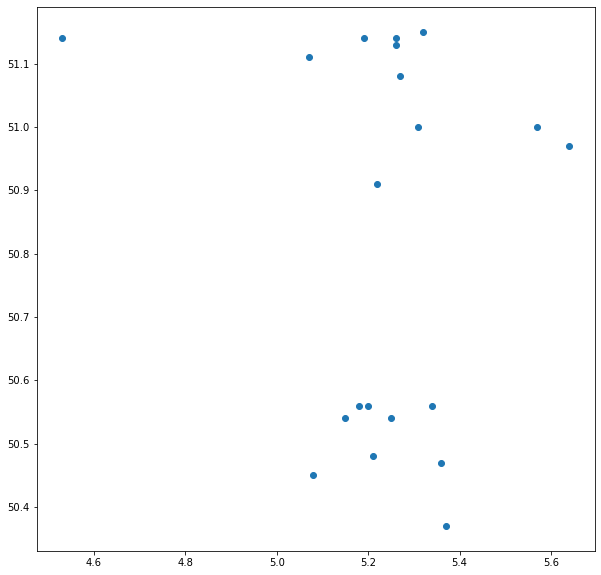

In [12]:
data_employees = {'EMPLOYEES': ['Tielen','Mol', 'Hasselt', 'Overpelt', 'Lommel', 'Stevoort', 'Zutendaal', 'Koersel', 'Peer', 'Borgloon', 'Waterschei - Zwartberg', 'As', 'Bonsin', 'Diepenbeek', 'Mechelen-Aan-De-Maas', 'Hamont', 'Gingelom', 'Neerpelt', 'Valmeer', 'Herk-de-Stad'], 'Long': [4.53, 5.07, 5.20, 5.26, 5.19, 5.15, 5.34, 5.18, 5.27, 5.21, 5.31, 5.57, 5.37, 5.25, 5.64, 5.32, 5.08, 5.26, 5.36, 5.22], 'Lat' :[51.14,51.11, 50.56, 51.13, 51.14, 50.54, 50.56, 50.56, 51.08, 50.48, 51.00, 51.00, 50.37, 50.54, 50.97, 51.15, 50.45, 51.14, 50.47, 50.91]}  
  
data_employees_dataframe = pd.DataFrame(data_employees)  

data_employees_dataframe

plt.figure(figsize=(10,10))
plt.scatter(data_employees_dataframe["Long"],data_employees_dataframe["Lat"])

<function matplotlib.pyplot.show(close=None, block=None)>

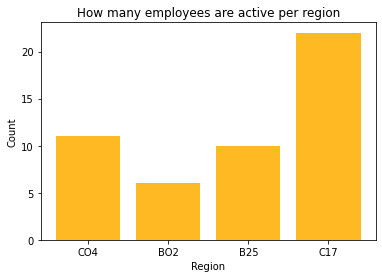

In [15]:
#How many times a region has been served
regions= ["CO4", "BO2", "B25", "C17"]
count = [11,6, 10, 22]

plt.bar(regions, count, color = "#ffb923")
plt.title('How many employees are active per region')
plt.xlabel("Region")
plt.ylabel("Count")
plt.show

In [ ]:
#How many routes there are per region
regions= ["CO4", "BO2", "B25", "C17"]
routes = [11,8, 10, 11]

plt.bar(regions, routes, color = "#ffb923")
plt.title('How many routes there are per region')
plt.xlabel("Region")
plt.ylabel("Number of routes")
plt.show

<BarContainer object of 4 artists>

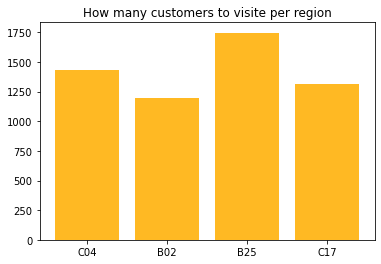

In [49]:
#Are there more customers to visite in a region?
plt.title("How many customers to visite per region")
plt.bar(["C04", "B02","B25", "C17"] ,[1433,1199,1747,1318], color = "#ffb923")


Vraag 5: Which routes should be reassigned to different depots?

Vraag 7: Which depots should be removed? Where should the company create new depots?

In [67]:
data = {'DEPOT': ['Deinze', 'Antwerpen', 'Vilvoorde', 'Aarschot'], 'Long': [3.5235857, 4.4024643, 4.4257868,4.8365218], 'Lat' :[50.9875406,51.2194475,50.9272511,50.9859959]}  
  
data_depot = pd.DataFrame(data)  
 
data_depot  


,DEPOT,Long,Lat
0,Deinze,3.523586,50.987541
1,Antwerpen,4.402464,51.219448
2,Vilvoorde,4.425787,50.927251
3,Aarschot,4.836522,50.985996


In [13]:
#group the depot to see which regions are present in a depot
agg_dict_depot = {"REGION": np.unique}
hvc_depot_route_grouped = hvc_depot_route.groupby("DEPOT").agg(agg_dict)

hvc_depot_route_grouped


NameError: name 'hvc_depot_route' is not defined

In [ ]:
#to see in which regions certain depots are active
#hvc_depot_route[hvc_depot_route["DEPOT"] == 'Deinze']["REGION"].value_counts()

plt.figure(figsize=(10,10))
new_list = range(0, 4)

plt.yticks(new_list)

plt.xlabel("Depots")
plt.ylabel("Number of regions")
for depot in hvc_depot_route["DEPOT"]:
    plt.bar(depot, len(hvc_depot_route[hvc_depot_route["DEPOT"] == depot]["REGION"].unique()), color = "#ffb923")
    #different colors for the bars or not?

plt.savefig("./data/fig_depots_serving_regions.jpeg")

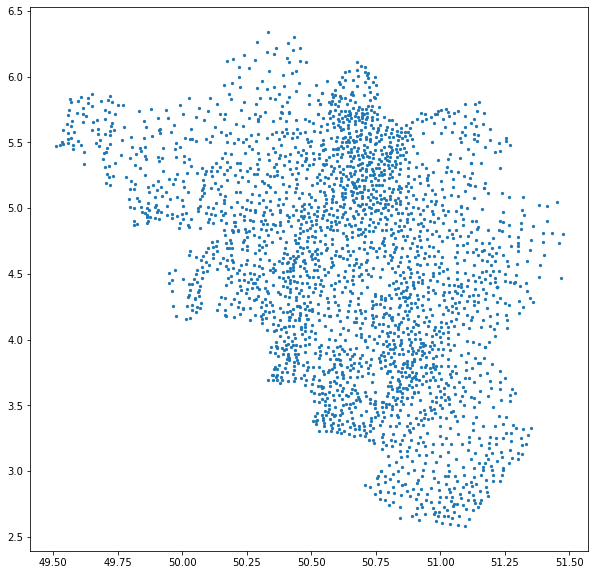

In [15]:
belgium_df = pd.read_csv("./data/zipcode-belgium.csv", header = None)

belgium_df

plt.figure(figsize=(10,10))
plt.scatter(belgium_df[3], belgium_df[2], s = 5)

In [16]:
belgium_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]

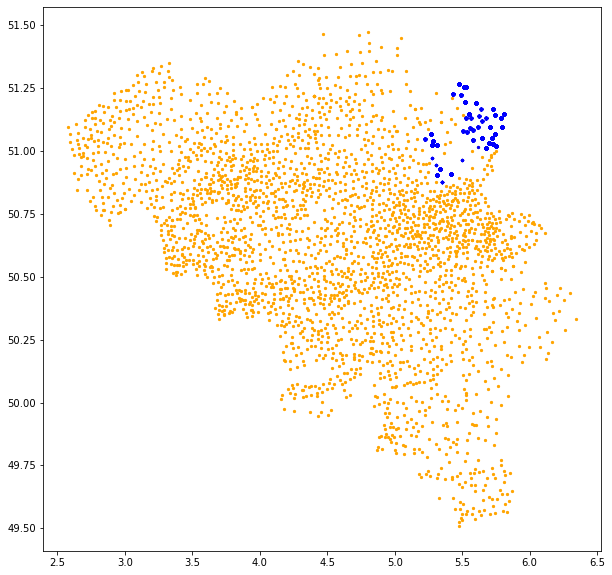

In [47]:
#juiste locaties geven aan de customers
hvc_customer_belgium = pd.merge(hvc_customer_regions,belgium_df, on = "POSTCODE")
hvc_customer_belgium

plt.figure(figsize=(10,10))
plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 5, color = "orange")
plt.scatter(hvc_customer_belgium["LONG"],hvc_customer_belgium["LAT"], s = 5, color = "blue")

plt.show()

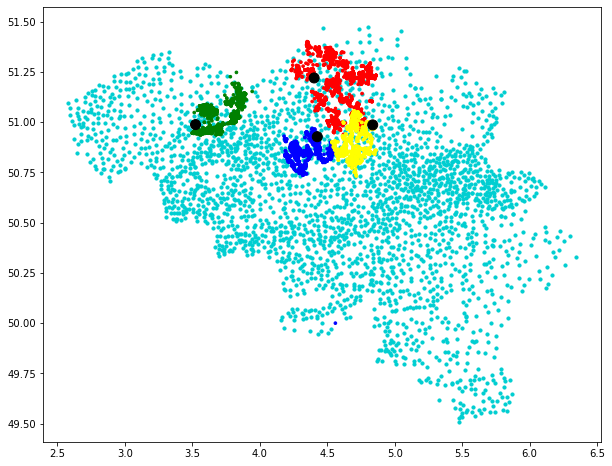

In [82]:
#Scatterplot with the regions and the depots

#long and lat
#Deinze: 50.590 , 3.3138
#Antwerpen: 51.13, 4.24
#Vilvoorde : 50.56, 4,25
#Aarschot: 50.59, 4.50

#Show the 4 regions in a scatterplotx
plt.figure(figsize = (10,8))
plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 10, color = "darkturquoise")
# define color map
color_region = {"C04": "green", "B25": "red", "B02": "blue", "C17":  "yellow"}

# get colors for each cluster label
cluster_region = [color_region[label] for label in hvc_customer_regions2["REGION"]]

# plot data with cluster colors
plt.scatter(hvc_customer_regions2["LAT"], hvc_customer_regions2["LONG"], color=cluster_region, s = 7)
#plt.savefig("./data/fig_region.pdf")

# define color map
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}

# get colors for each cluster label
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]]#in de juiste dataframe kijken om het depot te vinden


# plot data with cluster colors
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)

#Wil hier nog een legende bijplaatsen maar weet niet hoe
#plt.legend(["green","blue", "red", "yellow"])

plt.show()


Vraag 6: Which customers should be reassigned to different routes?

In [ ]:
#Scatterplot where you can see the routes

hvc_depot_route = pd.merge(hvc_depot, hvc_hvroutetemplate)
cust_pos_region = pd.merge(hvc_hvroutetemplate,hvc_customer_regions2)

# join customer info with customer positions

dict_mean = {}

for routeid in hvc_depot_route["HVROUTETEMPLATE_NRID"]:
    all_cust_route = cust_pos_region[cust_pos_region["HVROUTETEMPLATE_NRID"] == routeid]
    plt.figure(figsize=(10, 10))
    plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color="black", s = 7)
    plt.scatter(all_cust_route["LONG"], all_cust_route["LAT"], color="red", label="Route %s" %routeid + " in region %s" %cust_pos_region[cust_pos_region["HVROUTETEMPLATE_NRID"] == routeid]["REGION"].unique()[0],s = 10)
    
    plt.scatter(np.mean(all_cust_route["LONG"]), np.mean(all_cust_route["LAT"]), color ="yellow")
    
    dict_mean[routeid] = {np.mean(all_cust_route["LONG"]), np.mean(all_cust_route["LAT"])}
                
    
    plt.legend(loc="lower center")

plt.savefig("./data/routes.jpeg")
plt.show()



In [ ]:
b

In [ ]:
# define the colors for each cluster
color_dict = {0: "red", 1: "blue", 2: "green"}

# get the cluster color for each customer
cluster_colors = [color_dict[label] for label in cluster_labels]

# plot the customer locations with the corresponding colors
plt.figure(figsize=(8, 8))
plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color=cluster_colors, s=6)
plt.show()

In [53]:
#OpenLayers
import Map from 'ol/Map';
import View from 'ol/View';
import TileLayer from 'ol/layer/Tile';
import XYZ from 'ol/source/XYZ';

new Map({
  target: 'map',
  layers: [
    new TileLayer({
      source: new XYZ({
        url: 'https://{a-c}.tile.openstreetmap.org/{z}/{x}/{y}.png'
      })
    })
  ],
  view: new View({
    center: [0, 0],
    zoom: 2
  })
});

SyntaxError: invalid syntax (<ipython-input-53-b46287bc3a26>, line 2)